In [6]:
!pip install numpy pandas matplotlib seaborn opencv-python tensorflow

In [2]:
!ls -lh

total 4.0K
drwxr-xr-x 1 root root 4.0K Apr  9 13:38 sample_data


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip /content/drive/MyDrive/pneumonia_NIH_dataset.zip -d /content/pneumonia_data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/pneumonia_d

In [8]:
import os
data_dir ="/content/pneumonia_data/"
for root,dirs,files in os.walk(data_dir):
  print(f"\n Folder: {root}")
  print(f"\n Subfolders: {dirs}")
  print(f"\n Files: {files[:5]}")


 Folder: /content/pneumonia_data/

 Subfolders: ['chest_xray']

 Files: []

 Folder: /content/pneumonia_data/chest_xray

 Subfolders: ['test', '__MACOSX', 'chest_xray', 'train', 'val']

 Files: []

 Folder: /content/pneumonia_data/chest_xray/test

 Subfolders: ['NORMAL', 'PNEUMONIA']

 Files: []

 Folder: /content/pneumonia_data/chest_xray/test/NORMAL

 Subfolders: []

 Files: ['IM-0067-0001.jpeg', 'IM-0035-0001.jpeg', 'NORMAL2-IM-0351-0001.jpeg', 'IM-0023-0001.jpeg', 'NORMAL2-IM-0129-0001.jpeg']

 Folder: /content/pneumonia_data/chest_xray/test/PNEUMONIA

 Subfolders: []

 Files: ['person95_bacteria_463.jpeg', 'person85_bacteria_419.jpeg', 'person80_bacteria_390.jpeg', 'person175_bacteria_835.jpeg', 'person40_virus_87.jpeg']

 Folder: /content/pneumonia_data/chest_xray/__MACOSX

 Subfolders: ['chest_xray']

 Files: ['._chest_xray']

 Folder: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray

 Subfolders: ['test', 'train', 'val']

 Files: ['._train', '._.DS_Store', '._test']

 Fo

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Base path to your actual dataset
base_dir = "/content/pneumonia_data/chest_xray/chest_xray"

# Create generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Image size
image_size = (150, 150)
batch_size = 32

# Load images
train_generator = train_datagen.flow_from_directory(
    base_dir + "/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    base_dir + "/val",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    base_dir + "/test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary"
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 339ms/step - accuracy: 0.8243 - loss: 0.4351 - val_accuracy: 0.8750 - val_loss: 0.2307
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 270ms/step - accuracy: 0.9524 - loss: 0.1305 - val_accuracy: 0.8125 - val_loss: 0.3219
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 261ms/step - accuracy: 0.9626 - loss: 0.1117 - val_accuracy: 0.8750 - val_loss: 0.1936
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 266ms/step - accuracy: 0.9596 - loss: 0.0993 - val_accuracy: 0.9375 - val_loss: 0.1829
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 261ms/step - accuracy: 0.9749 - loss: 0.0806 - val_accuracy: 0.8750 - val_loss: 0.1572
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 264ms/step - accuracy: 0.9772 - loss: 0.0627 - val_accuracy: 0.8750 - val_loss: 0.1825
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 262ms/step - accuracy: 0.9807 - loss: 0.0586 - val_accuracy: 1.0000 - val_loss: 0.0643
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 260ms/step - accuracy: 0.9805 - loss: 0

In [15]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.7404 - loss: 2.1374
Test Accuracy: 71.63%


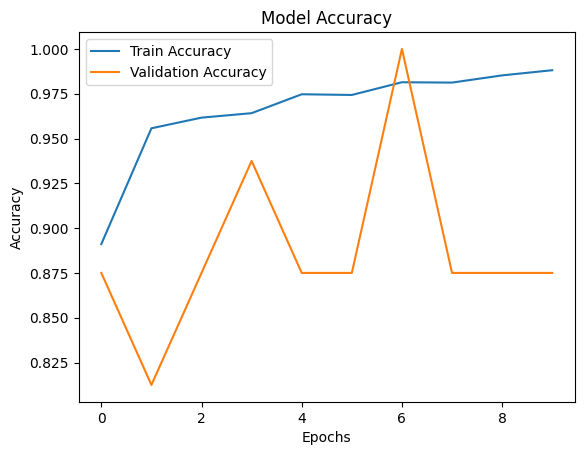

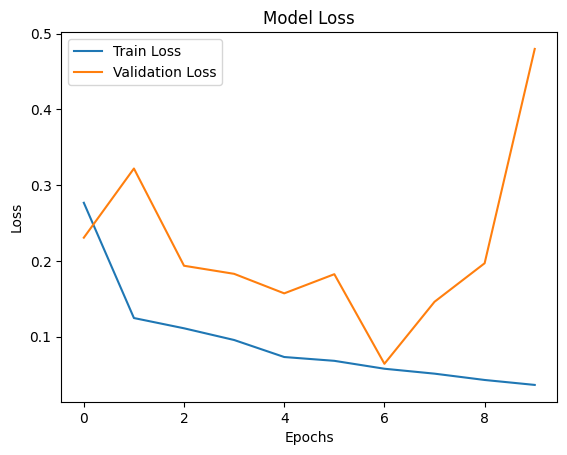

In [16]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


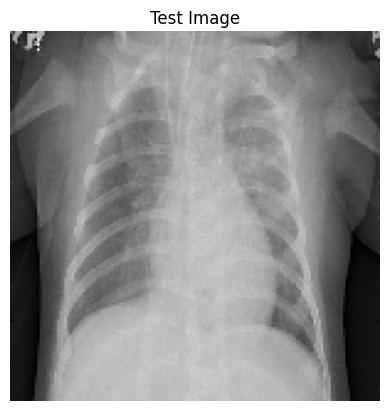

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
Prediction: Pneumonia
Actual label: Pneumonia


In [20]:
# Get one batch of images and labels from the test generator
test_imgs, test_labels = next(test_generator)

# Pick the first image in the batch
import matplotlib.pyplot as plt

plt.imshow(test_imgs[0])
plt.axis('off')
plt.title('Test Image')
plt.show()

# Predict
prediction = model.predict(np.expand_dims(test_imgs[0], axis=0))

# Show result
if prediction[0][0] > 0.5:
    print("Prediction: Pneumonia")
else:
    print("Prediction: Normal")

print(f"Actual label: {'Pneumonia' if test_labels[0] == 1 else 'Normal'}")


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get all predictions and true labels from the test set
test_generator.reset()  # Important: reset before prediction
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)
true_classes = test_generator.classes

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step
              precision    recall  f1-score   support

      NORMAL       0.36      0.09      0.15       234
   PNEUMONIA       0.62      0.90      0.74       390

    accuracy                           0.60       624
   macro avg       0.49      0.50      0.44       624
weighted avg       0.52      0.60      0.52       624



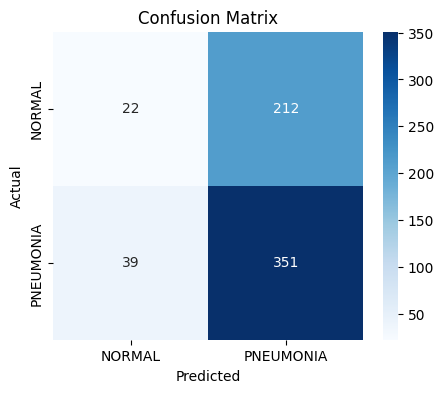

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
model.save("pneumonia_detection_cnn_model.h5")
print("Model saved!")


Model saved!
